# Reinforcement Learning
### Goal of lesson
- Understand how Reinforcement Learning works
- Learn about Agent and Environment
- How it iterates and gets rewards based on action
- How to continuously learn new things
- Create own Reinforcement Learning from scratch

### Reinforcement Learning simply explained
- Given a set of rewards or punishments, learn what actions to take in the future
- The second large group of Machine Learning

### Environment
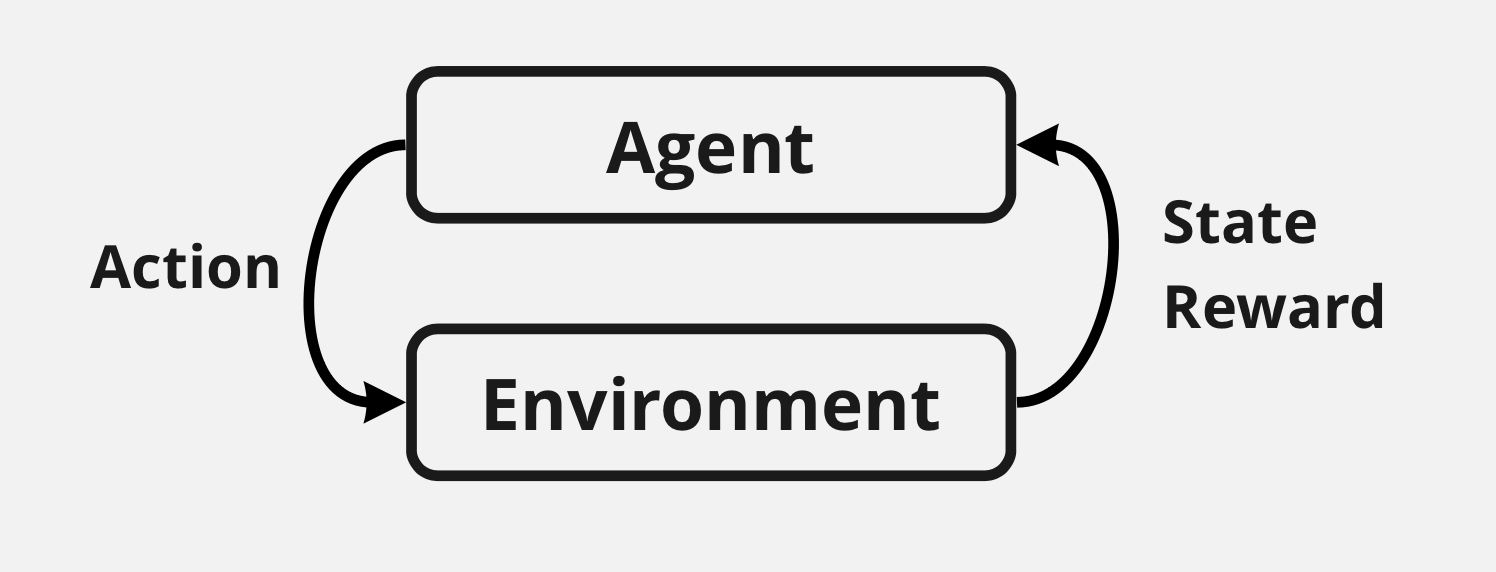

### Agent
- The environment gives the agent a state
- The agent action
- The environment gives a state and reward (or punishment)

This is how robots are taught how to walk

### Markov Decision Process
- Model for decision-making, representing states, actions, and their rewards
- Set of states $S$
- Set of actions $Actions(s)$
- Transition model $P(s'|s, a)$
- Reward function $R(s, a, s')$

### Q-learning (one model)
- Method for learning a function $Q(s, a)$, estimate of the value of performing action $a$ in state $s$

### Q-learning
- Start with $Q(s, a) = 0$ for all $s, a$
- Update $Q$ when we take an action
- $Q(s, a) = Q(s, a) + \alpha($reward$ + \gamma\max(s', a') - Q(s, a)) = (1 - \alpha)Q(s, a) + \alpha($reward$ + \gamma\max(s', a'))$

### $\epsilon$-Greedy Decision Making
**Explore vs Exploit**
- With propability $\epsilon$ take a random move
- Otherwise, take action $a$ with maximum $Q(s, a)$

### Simple task
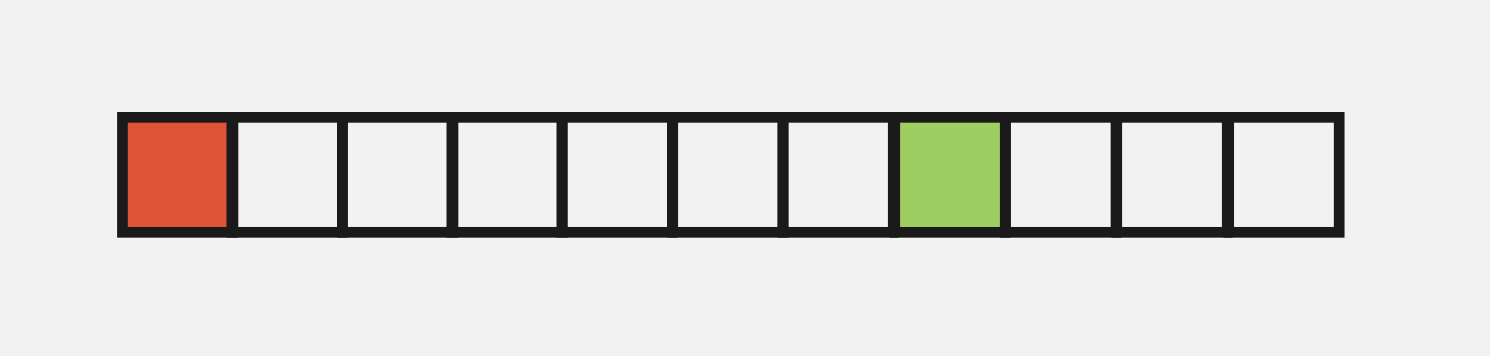


- Starts at a random point
- Move left or right
- Avoid the red box
- Find the green box

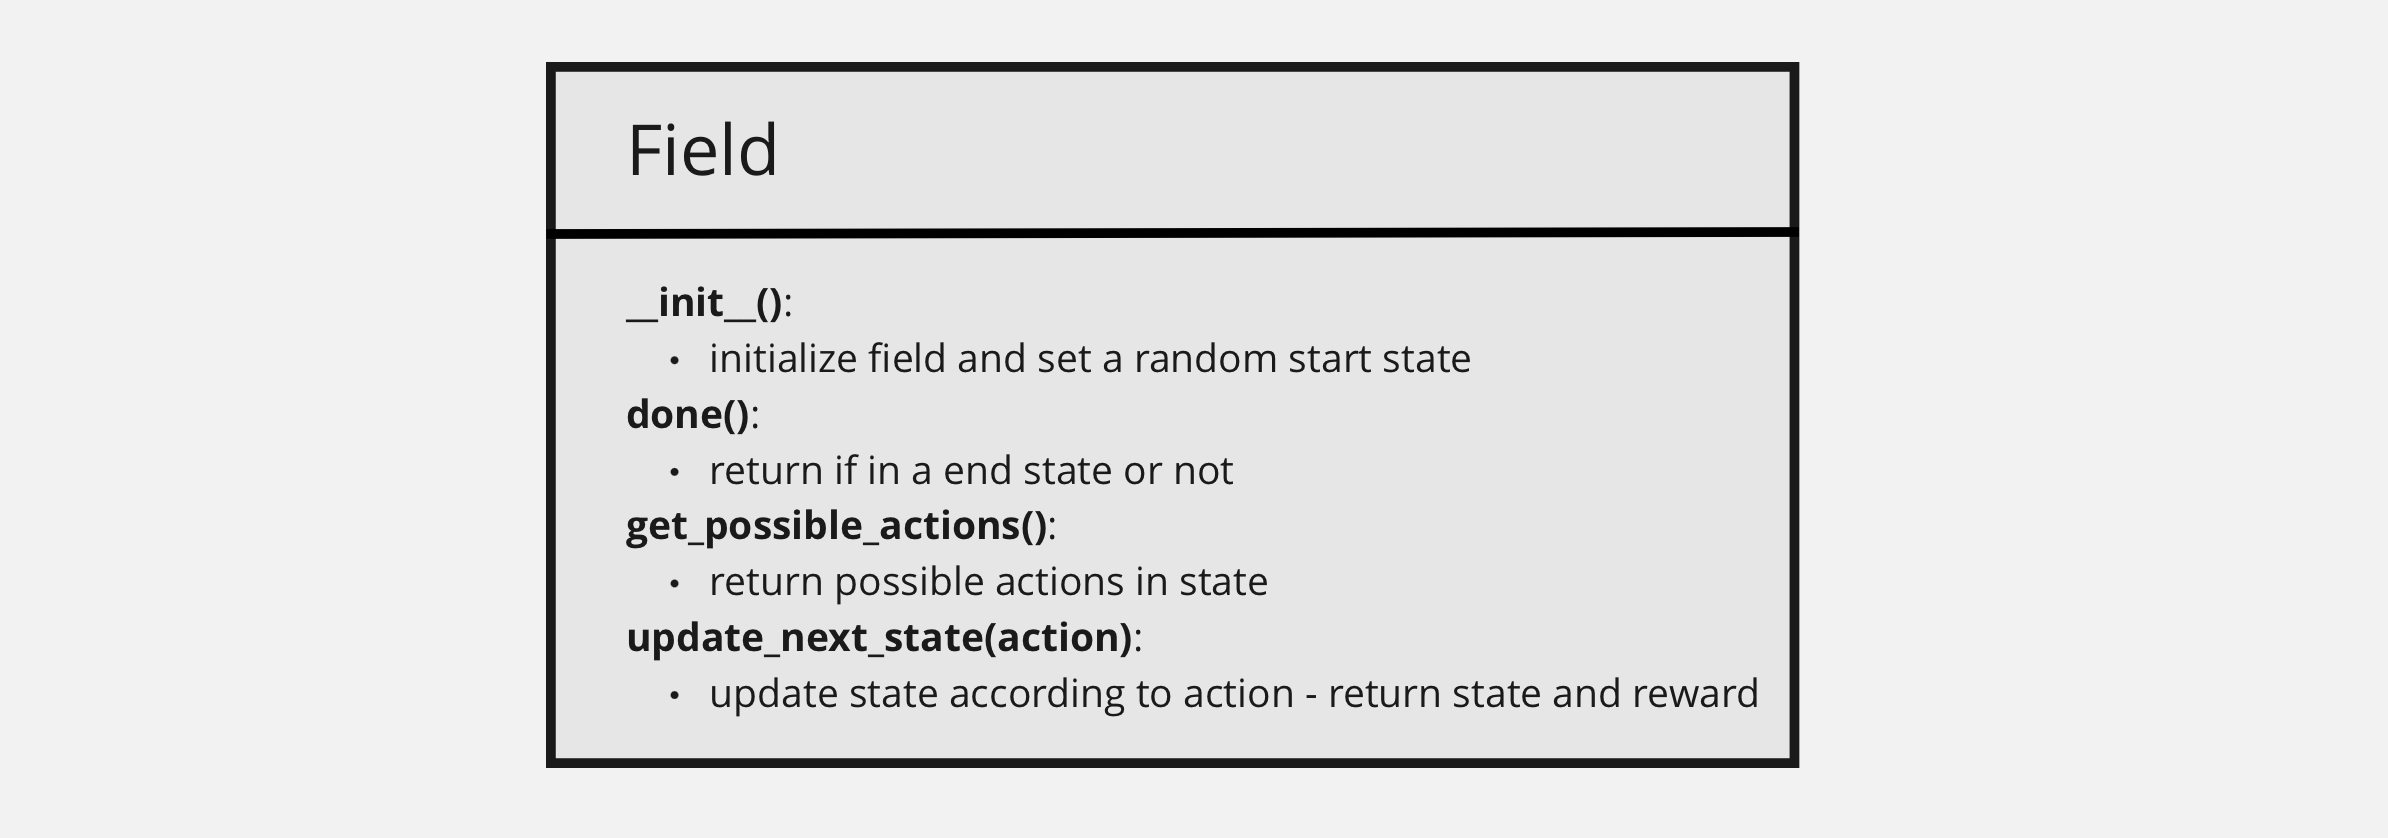

> #### Programming Notes:
> - Libraries used
>     - **numpy** - scientific computing with Python Lecture on NumPy
>     - **random** - pseudo-random generators
> - Functionality and concepts used
>     - **Object-Oriented Programming (OOP)**:

In [1]:
import numpy as np
import random

In [2]:
class Field:
    def __init__(self):
        self.states = [-1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
        self.state = random.randrange(0, len(self.states))
        
    def done(self):
        if self.states[self.state] != 0:
            return True
        else:
            return False
        
    # action: 0 => left
    # action: 1 => right
    def get_possible_actions(self):
        actions = [0, 1]
        if self.state == 0:
            actions.remove(0)
        if self.state == len(self.states) - 1:
            actions.remove(1)
        return actions

    def update_next_state(self, action):
        if action == 0:
            if self.state == 0:
                return self.state, -10
            self.state -= 1
        if action == 1:
            if self.state == len(self.states) - 1:
                return self.state, -10
            self.state += 1
        
        reward = self.states[self.state]
        return self.state, reward

In [3]:
field = Field()
field.state, field.done(), field.get_possible_actions()

(10, False, [0])

In [4]:
field.update_next_state(1)
field.state, field.done(), field.get_possible_actions()

(10, False, [0])

In [5]:
field.update_next_state(1)

(10, -10)

In [6]:
field = Field()
q_table = np.zeros((len(field.states), 2))

alpha = .5
epsilon = .5
gamma = .5

for _ in range(10000):
    field = Field()
    while not field.done():
        actions = field.get_possible_actions()
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = np.argmax(q_table[field.state])
            
        cur_state = field.state
        next_state, reward = field.update_next_state(action)
        
        q_table[cur_state, action] = (1 - alpha)*q_table[cur_state, action] + alpha*(reward + gamma*np.max(q_table[next_state]))

In [7]:
q_table

array([[ 0.      ,  0.      ],
       [-1.      ,  0.03125 ],
       [ 0.015625,  0.0625  ],
       [ 0.03125 ,  0.125   ],
       [ 0.0625  ,  0.25    ],
       [ 0.125   ,  0.5     ],
       [ 0.25    ,  1.      ],
       [ 0.      ,  0.      ],
       [ 1.      ,  0.25    ],
       [ 0.5     ,  0.125   ],
       [ 0.25    ,  0.      ]])